In [1]:
import sys
if not sys.argv[1] == "-f":
    path = sys.argv[1]
    IF = "01"
    mode = "commandline"
else:
    # 手動で解析する場合はデータのあるpathを指定してください
    #path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191215081505_12CO_2-1_otf_IRC10216/"
    #path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191215073824_12CO_2-1_otf_IRC10216"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121090140_12CO_2-1_otf_OriKL/"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121104455_12CO_2-1_otf_OriKL/"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121093655_12CO_2-1_otf_OriKL/"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121100937_12CO_2-1_otf_OriKL"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121111831_12CO_2-1_otf_OriKL/"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191122093500_12CO_2-1_otf_IRC10216/"
    path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191122085611_12CO_2-1_otf_IRC10216/"
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191124072241_12CO_2-1_otf_IRC10216"
    path  = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121050456_12CO_2-1_otf_OriKL/"#x0
    #path = "/home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191121053852_12CO_2-1_otf_OriKL/"#x1
    path = "/home/amigos/seigyo/hdd2/copy_HDD4_201912/otf_2019/n20191218010049_12CO_2-1_otf_OriKL/"#n20191218010049_12CO_2-1_otf_OriKL
    savedir = "/home/amigos/seigyo/analy/shiotani/nasco/raw/"    
    mode = "notebook"
    %matplotlib inline

In [2]:
! ls /home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191124072241_12CO_2-1_otf_IRC10216/*.txt

ls: /home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/n20191124072241_12CO_2-1_otf_IRC10216/*.txt にアクセスできません: そのようなファイルやディレクトリはありません


In [3]:
#! du -sh  /home/amigos/seigyo/hdd4/HDD2_copy/observation/otf/otf_2019/*

In [4]:
sys.path.append("/home/amigos/seigyo/analy/shiotani/git/analy_n2data/")

In [5]:
import necstdb
import numpy
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt
from numpy import deg2rad
from tqdm import tqdm
import n2analy
import xarray as xr
from scipy import interpolate#dp shift

In [6]:
from datetime import datetime
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, FK5, AltAz, Galactic
import astropy.units as u
#Parameter
latitude = -22.96995611
longitude = -67.70308139
height = 4863.85
nanten2 = EarthLocation(lat = latitude*u.deg, lon = longitude*u.deg, height = height*u.m)
from numpy import deg2rad, sin

In [7]:
plt.rcParams["font.family"] = "Arial,freesans"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 14#23
plt.rcParams["mathtext.fontset"] = "stix" 

In [8]:
ra, dec, ant_time = n2analy.get_radec(os.path.join(path, "wc_list.txt"))

In [ ]:
#Horizontal OTF用
f = open(os.path.join(path, "offset_12.txt"))
#f = open("/home/amigos/seigyo/analy/shiotani/nasco/offset/offset_31.txt")
xydata = f.read()
xydata = xydata.split("\n")

_d = []
for i in xydata:
    _d.append(i.split("#"))
_d = numpy.array(_d)

_dxy = []
for i in _d:
    try:
        _dxy.append([i[0], i[2], i[4]])
        _dxy.append([i[1], i[3], i[5]])
    except:
        pass
_dxy = numpy.array(_dxy)
_dxy = _dxy.astype(numpy.float64)
plt.plot(_dxy.T[0], _dxy.T[1], ".")
ra = _dxy.T[0]
dec = _dxy.T[1]
ant_time = _dxy.T[2]

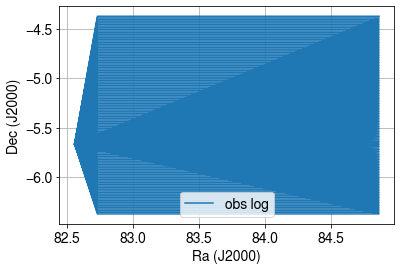

In [9]:
#みたいだけ
ra = numpy.array(ra)/3600
dec = numpy.array(dec)/3600
ra = numpy.where(ra < 0, ra+360, ra)#問題
# plt.xlim(83.6, 84.2)
# plt.ylim(-5.6, -5.2)
plt.xlabel("Ra (J2000)")
plt.ylabel("Dec (J2000)")
plt.grid()
plt.plot(ra, dec, label="obs log")
plt.legend()
plt.show()

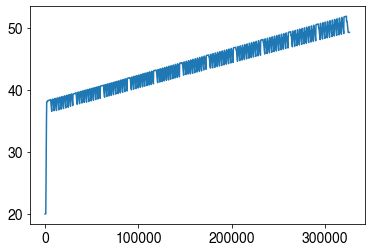

In [10]:
#気象情報の確認
nw = necstdb.opendb(path)
_nw = nw.open_table("status_encoder")
encoder_data = _nw.read()
encoder_data = numpy.array(encoder_data)
plt.plot(encoder_data.T[2]/3600)
xffts_az = numpy.array(encoder_data.T[1]/3600)
xffts_el = numpy.array(encoder_data.T[2]/3600)

In [12]:
IF = "01"
data = n2analy.get_data(path, IF)

read end


 25%|██▌       | 1/4 [00:00<00:00,  4.63it/s]

HOT 1.0
HOT 100.0
HOT 101.0
HOT 102.0
HOT 103.0
HOT 104.0
HOT 105.0
HOT 106.0
HOT 107.0
HOT 108.0
HOT 11.0
HOT 110.0
HOT 111.0
HOT 112.0
HOT 113.0
HOT 114.0
HOT 115.0
HOT 116.0
HOT 117.0
HOT 118.0
HOT 119.0
HOT 12.0
HOT 13.0
HOT 14.0
HOT 15.0
HOT 16.0
HOT 17.0
HOT 18.0
HOT 19.0
HOT 2.0
HOT 20.0
HOT 22.0
HOT 23.0
HOT 24.0
HOT 25.0
HOT 26.0
HOT 27.0
HOT 28.0
HOT 29.0
HOT 3.0
HOT 30.0
HOT 31.0
HOT 33.0
HOT 34.0
HOT 35.0
HOT 36.0
HOT 37.0
HOT 38.0
HOT 39.0
HOT 4.0
HOT 40.0
HOT 41.0
HOT 42.0
HOT 44.0
HOT 45.0
HOT 46.0
HOT 47.0
HOT 48.0
HOT 49.0
HOT 5.0
HOT 50.0
HOT 51.0
HOT 52.0
HOT 53.0
HOT 55.0
HOT 56.0
HOT 57.0
HOT 58.0
HOT 59.0
HOT 6.0
HOT 60.0
HOT 61.0
HOT 62.0
HOT 63.0
HOT 64.0
HOT 66.0
HOT 67.0
HOT 68.0
HOT 69.0
HOT 7.0
HOT 70.0
HOT 71.0
HOT 72.0
HOT 73.0
HOT 74.0
HOT 75.0
HOT 77.0
HOT 78.0
HOT 79.0
HOT 8.0
HOT 80.0
HOT 81.0
HOT 82.0
HOT 83.0
HOT 84.0
HOT 85.0
HOT 86.0
HOT 88.0
HOT 89.0
HOT 9.0
HOT 90.0
HOT 91.0
HOT 92.0
HOT 93.0
HOT 94.0
HOT 95.0
HOT 96.0
HOT 97.0


 50%|█████     | 2/4 [00:00<00:00,  4.42it/s]

HOT 99.0
1.0 OFF 0.0 0.0
100.0 OFF 0.0 0.0
101.0 OFF 0.0 0.0
102.0 OFF 0.0 0.0
103.0 OFF 0.0 0.0
104.0 OFF 0.0 0.0
105.0 OFF 0.0 0.0
106.0 OFF 0.0 0.0
107.0 OFF 0.0 0.0
108.0 OFF 0.0 0.0
11.0 OFF 0.0 0.0
110.0 OFF 0.0 0.0
111.0 OFF 0.0 0.0
112.0 OFF 0.0 0.0
113.0 OFF 0.0 0.0
114.0 OFF 0.0 0.0
115.0 OFF 0.0 0.0
116.0 OFF 0.0 0.0
117.0 OFF 0.0 0.0
118.0 OFF 0.0 0.0
119.0 OFF 0.0 0.0
12.0 OFF 0.0 0.0
121.0 OFF 0.0 0.0
13.0 OFF 0.0 0.0
14.0 OFF 0.0 0.0
15.0 OFF 0.0 0.0
16.0 OFF 0.0 0.0
17.0 OFF 0.0 0.0
18.0 OFF 0.0 0.0
19.0 OFF 0.0 0.0
2.0 OFF 0.0 0.0
20.0 OFF 0.0 0.0
22.0 OFF 0.0 0.0
23.0 OFF 0.0 0.0
24.0 OFF 0.0 0.0
25.0 OFF 0.0 0.0
26.0 OFF 0.0 0.0
27.0 OFF 0.0 0.0
28.0 OFF 0.0 0.0
29.0 OFF 0.0 0.0
3.0 OFF 0.0 0.0
30.0 OFF 0.0 0.0
31.0 OFF 0.0 0.0
33.0 OFF 0.0 0.0
34.0 OFF 0.0 0.0
35.0 OFF 0.0 0.0
36.0 OFF 0.0 0.0
37.0 OFF 0.0 0.0
38.0 OFF 0.0 0.0
39.0 OFF 0.0 0.0
4.0 OFF 0.0 0.0
40.0 OFF 0.0 0.0
41.0 OFF 0.0 0.0
42.0 OFF 0.0 0.0
44.0 OFF 0.0 0.0
45.0 OFF 0.0 0.0
46.0 OFF 0.0 0.0
47.0 O

 75%|███████▌  | 3/4 [00:00<00:00,  3.23it/s]

75.0 OFF 0.0 0.0
77.0 OFF 0.0 0.0
78.0 OFF 0.0 0.0
79.0 OFF 0.0 0.0
8.0 OFF 0.0 0.0
80.0 OFF 0.0 0.0
81.0 OFF 0.0 0.0
82.0 OFF 0.0 0.0
83.0 OFF 0.0 0.0
84.0 OFF 0.0 0.0
85.0 OFF 0.0 0.0
86.0 OFF 0.0 0.0
88.0 OFF 0.0 0.0
89.0 OFF 0.0 0.0
9.0 OFF 0.0 0.0
90.0 OFF 0.0 0.0
91.0 OFF 0.0 0.0
92.0 OFF 0.0 0.0
93.0 OFF 0.0 0.0
94.0 OFF 0.0 0.0
95.0 OFF 0.0 0.0
96.0 OFF 0.0 0.0
97.0 OFF 0.0 0.0
99.0 OFF 0.0 0.0
121.0 ON 0.0 0.0


100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


In [13]:
data["scannum"] = data["scannum"].astype(numpy.float32).astype(numpy.int32)

In [ ]:
#chopper wheel

In [14]:
# #off integration
# off = []
# scanmasks = numpy.unique(data["scannum"])
# for i in scanmasks:
#     _off = n2analy.get_maskedcube(data, "OFF", i)
#     off.append(numpy.mean(_off, axis=0))

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/amigos/.local/share/virtualenvs/analy-E

In [15]:
# #hot integration
# hot = []
# for i in scanmasks:
#     _hot = n2analy.get_maskedcube(data, "HOT", i)
#     hot.append(numpy.mean(_hot.values, axis=0))

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

In [34]:
off = []
scanmasks = numpy.unique(data["scannum"])
for i in scanmasks:
    _off = n2analy.get_maskedcube(data, "OFF", i)
    off.append(numpy.mean(_off.values, axis=0))

off = numpy.array(off)
offindex = numpy.where(numpy.mean(off, axis=1)>0)[0]
newoff = []
for i in range(len(off)):
    if i in offindex:
        newoff.append(off[i])
        nh = off[i]
    else:
        newoff.append(nh)
off = newoff

# In[ ]:

#hot integration
hot = []
for i in scanmasks:
    _hot = n2analy.get_maskedcube(data, "HOT", i)
    hot.append(numpy.mean(_hot.values, axis=0))

hot = numpy.array(hot)
hotindex = numpy.where(numpy.mean(hot, axis=1)>0)[0]
newhot = []
for i in range(len(hot)):
    if i in hotindex:
        newhot.append(hot[i])
        nh = hot[i]
    else:
        newhot.append(nh)
hot = newhot

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=Fa

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/amigos/.local/share/virtualenvs/analy-Eyq-irNF/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/amigos/.local/share/virtualenvs/analy-E

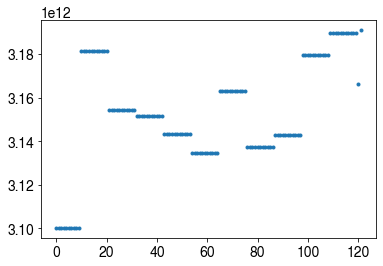

In [38]:
#hot = numpy.array(hot)
plt.plot(numpy.mean(hot,axis=1), ".")

In [ ]:
#hotindex = numpy.where(numpy.mean(hot, axis=1)>0)[0]

In [ ]:
#hotindex[0]

In [ ]:
# newhot = []
# for i in range(len(hot)):
#     if i in hotindex:
#         newhot.append(hot[i])
#         nh = hot[i]
#     else:
#         newhot.append(nh)
# plt.plot(numpy.mean(newhot, axis=1))

In [16]:
onmask = data["obsmode"] == "ON"
on_data = data[onmask]

In [51]:
# tastar_list = []
# for i in tqdm(range(len(on_data["scannum"]))):
#     scannum = int(on_data["scannum"][i])
#     tastar_list.append(numpy.array(n2analy.chopper_wheel(on_data[i], off[0], hot[0], 300)))
tastar_list = []
for i in tqdm(range(len(on_data["scannum"]))):
    scannum = int(on_data["scannum"][i])
    tastar_list.append(numpy.array(n2analy.chopper_wheel(on_data[i], off[scannum], hot[scannum], 300)))

100%|██████████| 19054/19054 [00:24<00:00, 793.24it/s]


In [40]:
tastar_list = numpy.array(tastar_list)

In [ ]:
#OriKL
# lamda_on = 83.80613*3600
# #lamda_on = 84.05613 *3600
# grid = 30
# beta_on = -5.374320*3600
# N=31

# #M17SW
# lamda_on = -84.9232  *3600
# grid = 30
# beta_on =  -16.2003 *3600
# N=31

In [ ]:
#azel_grid = n2analy.make_grid(lamda_on, beta_on, N, grid)

In [41]:
index = []
xffts_timestamp = numpy.array(data[onmask]["t"])
for i in range(len(xffts_timestamp)):
    try:
        a = numpy.where(ant_time >  xffts_timestamp[i])
        #print(a)
        index.append(a[0][0])
    except Exception as e:
        print(e, i)

index 0 is out of bounds for axis 0 with size 0 19053


In [42]:
ant_time = numpy.array(ant_time)

diff_ra = ra[1:] - ra[:-1]
diff_dec = dec[1:] - dec[:-1]
diff_time = ant_time[1:] - ant_time[:-1]

In [43]:
onmask = data["obsmode"] == "ON"
offmask = data["obsmode"] == "OFF"
hotmask = data["obsmode"] == "HOT"
xffts_timestamp = numpy.array(data["t"])[onmask]

In [44]:
xffts_ra = []
xffts_dec = []
xffts_time = []
for n, i in enumerate(index):
    try:
        xffts_ra.append((diff_ra[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + ra[i-1])#i-1
        xffts_dec.append((diff_dec[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + dec[i-1])#i-1
        xffts_time.append(xffts_timestamp[n])
    except Exception as e:
        print(e, i)
        
xffts_ra = numpy.array(xffts_ra)
xffts_dec = numpy.array(xffts_dec)

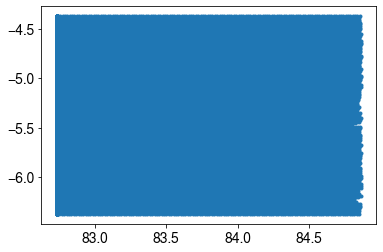

In [45]:
plt.plot(xffts_ra, xffts_dec, ".")

In [46]:
# tastar_list = xr.DataArray(tastar_list, dims=["t", "GHz"],
#                            coords={"t":data["t"][onmask], "GHz":data["GHz"],
#                                    "scannum":("t", data["scannum"][onmask]),
#                                   "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

tlen = len(xffts_ra)
# tastar_list = xr.DataArray(tastar_list[:tlen], dims=["t", "GHz"],
#                            coords={"t":data["t"][onmask][:tlen], "GHz":data["GHz"],
#                                    "scannum":("t", data["scannum"][onmask][:tlen]),
#                                   "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

In [ ]:
ta

In [52]:
ta = []
for i in tqdm(range(len(tastar_list))):
    #ta.append(n2analy.baseline_fitting(numpy.arange(0, 32768, 1), tastar_list[i], 17000,17500 , 18500, 19000))#?
    ta.append(n2analy.baseline_fitting(numpy.arange(0, 32768, 1), tastar_list[i], 21100,21600 , 22400, 22900))#?
    #ta.append(n2analy.baseline_fitting(numpy.arange(0, 32768, 1), tastar_list[i], 21200,21400 , 21800, 22000))#201911 IRC
    #ta.append(n2analy.baseline_fitting(numpy.arange(0, 32768, 1), tastar_list[i], 19500,20000 , 23000, 23500))#201911 IRC

100%|██████████| 19054/19054 [00:16<00:00, 1181.38it/s]


(-20, 5.6)

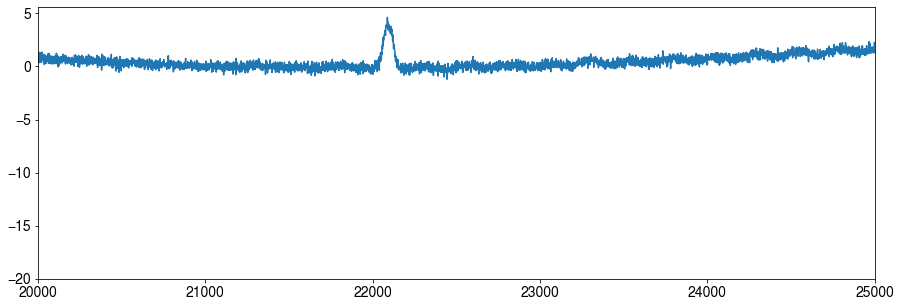

In [31]:
plt.figure(figsize=(15, 5))
ff = numpy.ones(1)/1
#plt.plot(numpy.convolve(ff, numpy.mean(tastar_list[7000:9000], axis=0), "same"))
plt.plot(numpy.convolve(ff, numpy.mean(ta[7000:9000], axis=0), "same"))
#plt.plot(ta[1000])
plt.xlim(20000, 25000)
plt.ylim(-20, 5.6)

In [53]:
# tastar_list = xr.DataArray(ta[:tlen], dims=["t", "GHz"],
#                            coords={"t":data["t"][onmask][:tlen], "GHz":data["GHz"],
#                                    "scannum":("t", data["scannum"][onmask][:tlen]),
#                                   "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

# tastar_list = xr.DataArray(tastar_list[:tlen], dims=["t", "GHz"],
#                            coords={"t":data["t"][onmask][:tlen], "GHz":data["GHz"],
#                                    "scannum":("t", data["scannum"][onmask][:tlen]),
#                                   "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

tastar_list = xr.DataArray(ta[:tlen], dims=["t", "GHz"],
                           coords={"t":data["t"][onmask][:tlen], "GHz":data["GHz"],
                                   "scannum":("t", data["scannum"][onmask][:tlen]),
                                  "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

In [54]:
#中間データ保存
tastar_list.to_netcdf(f"{savedir}/n20191218010049_12CO_2-1IF01_fix2.cdf")

In [56]:
#Doppler tracking
from numpy import deg2rad
dp = n2analy.doppler_nanten()
vobs = [dp.calc_vobs(deg2rad(xffts_ra[i]),deg2rad(xffts_dec[i]), ant_time[i]) for i in tqdm(range(len(ant_time)))]

100%|██████████| 484/484 [01:01<00:00,  7.82it/s]


In [57]:
vobs = numpy.array(vobs)
_diff_vobs = vobs[1:] - vobs[:-1]

In [58]:
_vobs = []
for n, i in enumerate(index):
    try:
        _vobs.append((_diff_vobs[i-1]/diff_time[i-1]) * (xffts_timestamp[n] - ant_time[i-1]) + vobs[i-1])#i-1
    except Exception as e:
        print(e)
_vobs = numpy.array(_vobs)

In [ ]:
_vobs

In [59]:
#rx info
first_lo = 17.4452003333
#first_lo = 17.499998000
second = 9.5
#second = 8.97
from astropy.units import GHz
print(n2analy.rf12CO_1_0 - first_lo*6*GHz - second*GHz)
#center_ch = 1.1*32768/2
center_ch = 1.37*32768/2
#center_ch = 1.1*32768/2
#delta_dv = 0.15873765#13CO 2-1          #0.165/2
delta_dv = 	0.07937034#12CO2-1
from astropy.constants import c
c*((2*GHz/32768)/n2analy.rf12CO_1_0)

1.1000020001999928 GHz


<Quantity 158.7376455 m / s>

In [60]:
start = 0
end = delta_dv*32768
dparray = numpy.arange(start, end, delta_dv)*-1

In [61]:
_dparray
_vobs

NameError: name '_dparray' is not defined

In [62]:
_dparray = dparray + center_ch*delta_dv
shift_ch = _vobs/delta_dv

In [63]:
shift_ch

array([-248.58148693, -248.58151887, -248.58155168, ..., -249.83645518,
       -249.83649319, -249.83653222])

In [64]:
_ch = numpy.linspace(0, 32768, 32768)
dpshift_tastar = []
xx = tastar_list
for i in tqdm(range(len(xx))):
    f = interpolate.interp1d(_ch, xx[i])
    s_tastar = f(_ch[1000:-1000] + shift_ch[i])
    #s_tastar = f(_ch[1000:-1000] + 0)
    dpshift_tastar.append(s_tastar)

100%|██████████| 19053/19053 [00:33<00:00, 570.08it/s]


In [65]:
for i in tqdm(range(len(dpshift_tastar))):
    dpshift_tastar[i] = n2analy.baseline_fitting(_dparray[1000:-1000], dpshift_tastar[i], 20100,20600 , 21400, 21900)

100%|██████████| 19053/19053 [00:48<00:00, 394.03it/s]


In [68]:
dptastar_list = xr.DataArray(dpshift_tastar, dims=["t", "Vlsr"],
                           coords={"t":data["t"][onmask][:tlen], "Vlsr":_dparray[1000:-1000],
                                   "scannum":("t", data["scannum"][onmask][:tlen]),
                                  "RA":("t", xffts_ra), "DEC":("t", xffts_dec)})

In [69]:
dpshift_tastar = numpy.array(dpshift_tastar)

(-10, 10)

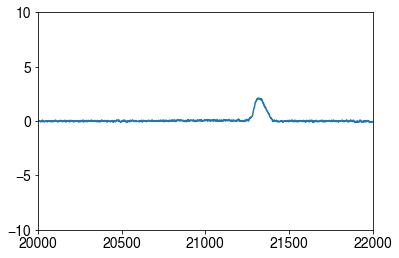

In [73]:
plt.plot(numpy.mean(dpshift_tastar, axis=0))
plt.xlim(20000, 22000)
plt.ylim(-10, 10)

In [74]:
#中間データ保存
dptastar_list.to_netcdf(f"{savedir}/test.cdf")

In [ ]:
savedir

In [ ]:
#中間データ読み込み
#tastar_cube = xr.open_dataarray(f"{savedir}/n20191201033807_OrionB5_IF07_hosei.cdf")
#tastar_cube = xr.open_dataarray("/home/amigos/seigyo/analy/shiotani/nasco/raw/n20191202015317_D2_IF11_hosei.cdf")

In [ ]:
isp =  numpy.mean(tastar_cube, axis=0)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(tastar_cube["Vlsr"],isp)
ax.set_xlim(-40, 100)
ax.set_ylim(-5, 5)
ax.set_xlabel("Vlsr (km/s)")
ax.set_ylabel("Ta* (K)")
ax.grid(True)